In [1]:
import copy
import os
import pathlib
import time
from typing import Mapping
import itertools

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt

In [3]:
from drmdp import dataproc

In [4]:
import warnings

In [5]:
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [6]:
warnings.filterwarnings("ignore")

In [7]:
files = tf.io.gfile.glob(
    f"{pathlib.Path.home()}/fs/drmdp/workflows/controljob/agg/1763120034/1763137330/metrics/*.parquet"
)

In [8]:
df_metrics = dataproc.read_data(files, reader="pd")

In [9]:
df_metrics.iloc[0]["meta"]["env_spec"]

{'args': {'constraint_violation_reward': -10.0,
  'emit_state': True,
  'max_episode_steps': 10000,
  'penalty_gamma': 1.0,
  'reward_fn': 'pos-enf'},
 'feats_spec': {'args': None, 'name': 'scale'},
 'name': 'Finite-TC-ShuntDc-v0'}

In [10]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
0,250,1763120034-0541946b-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1166.9694295443726, 1821.786532668395, 1279.3...","[2135, 1038, 980, 687, 1031, 1456, 668, 1973, ...","{'returns': {'mean': 1590.8574759418373, 'std'...",FR
1,250,1763120034-078ace44-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1233.9993188066744, 1226.0556551239783, 911.4...","[207, 72, 45, 663, 364, 1356, 1958, 436, 70, 9...","{'returns': {'mean': 1205.6348442049234, 'std'...",BLADE-TD
2,250,1763120034-0f495b0d-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[18194.995057068074, 18930.775810710056, 18965...","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 18143.385609982528, 'std'...",DMR
3,250,1763120034-03297052-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[18927.069956467905, 18822.31747040419, 18976....","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 18275.500267493597, 'std'...",DMR
4,250,1763120034-0a5b9c15-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1315.1223026231526, 1236.6400844641971, 1317....","[191, 702, 580, 1660, 263, 350, 314, 3009, 228...","{'returns': {'mean': 1342.2280210041272, 'std'...",FR
...,...,...,...,...,...,...,...
247,420,1763120034-d100f64b-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1087.091855966162, 2854.354725581369, 4414.51...","[222, 3602, 10000, 4265, 3816, 7890, 2814, 100...","{'returns': {'mean': 2815.5111304651336, 'std'...",BLADE-TD[N-B]
248,420,1763120034-f6d7bba7-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1065.4797525546705, 1038.6901546594227, 1044....","[427, 849, 68, 1855, 1139, 328, 845, 1025, 14,...","{'returns': {'mean': 976.4654795174813, 'std':...",IMR
249,420,1763120034-f87b4ef1-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[12878.428296760741, 16332.928597073538, 12213...","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 14379.725729830892, 'std'...",BLADE-TD
250,420,1763120034-fbc639af-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[16119.556191530583, 16396.892585095524, 16631...","[10000, 10000, 10000, 535, 10000, 1608, 10000,...","{'returns': {'mean': 14640.848488118598, 'std'...",BLADE-TD[N-B]


In [11]:
envs = dataproc.get_distinct_envs(df_metrics)

In [12]:
for env_name, spec in sorted(envs.items()):
    print(env_name, spec)

Finite-CC-PermExDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-ShuntDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-PermExDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-ShuntDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': True, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-PermExDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-ShuntDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': True, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}


In [13]:
def parse_delay_config(df_input: pd.DataFrame):
    df = copy.deepcopy(df_input)

    def parse_mu(delay_config):
        if delay_config is None:
            return None
        args = delay_config["args"]
        try:
            return args["delay"]
        except KeyError:
            return args["lam"]
        except KeyError as exc:
            raise ValueError(f"Unknown delay config {args}") from exc

    df["delay_type"] = df["delay_config"].apply(lambda dc: dc["name"] if dc else None)
    df["delay_mu"] = df["delay_config"].apply(parse_mu)
    del df["delay_config"]
    return df

## Return Curvers

In [14]:
def create_returns_plotting_data(
    df_data: pd.DataFrame,
):
    df_result = copy.deepcopy(df_data)
    for key in (
        "delay_config",
        "gamma",
    ):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"]),
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    del df_result["meta"]
    del df_result["steps"]
    del df_result["metrics"]

    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    # Replicate baseline results for each config
    # to make plotting easier.
    for row in distinct_algo_configs.to_dict("records"):
        print(row)
        df_baseline_rp = copy.deepcopy(df_baseline)
        # reward period is one
        df_baseline_rp["delay_type"] = row["delay_type"]
        df_baseline_rp["delay_mu"] = row["delay_mu"]
        baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])

    # agg returns
    return {"sarsa": df_result}

In [15]:
df_returns_curves = create_returns_plotting_data(df_metrics)

{'delay_type': 'clipped-poisson', 'delay_mu': 6.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 2.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 4.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 8.0}


In [16]:
df_returns_curves["sarsa"]

,episode,exp_id,returns,method,gamma,env_name,env_args,feats_name,feats_args,delay_type,delay_mu
19,250,1763120034-0b8bde2f-Finite-CC-PermExDc-v0,"[7165.999824426241, 15091.695754607274, 13425....",BLADE-TD,1.00,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},clipped-poisson,2.0
51,250,1763120034-1ee63f1f-Finite-SC-PermExDc-v0,"[1268.1695289244014, 1331.095689483186, 1273.6...",BLADE-TD,1.00,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 3.0},clipped-poisson,2.0
62,250,1763120034-3330bb22-Finite-CC-ShuntDc-v0,"[18848.354116668223, 18855.958070479548, 18668...",BLADE-TD,0.99,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},clipped-poisson,2.0
84,250,1763120034-59706b99-Finite-CC-PermExDc-v0,"[8538.308665617338, 11064.158674513366, 4954.7...",BLADE-TD,0.99,Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},clipped-poisson,2.0
90,250,1763120034-5fdebc68-Finite-TC-PermExDc-v0,"[12378.164105914662, 9634.538933504884, 7126.9...",BLADE-TD,1.00,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},clipped-poisson,2.0
...,...,...,...,...,...,...,...,...,...,...,...
167,420,1763120034-a72620da-Finite-CC-ShuntDc-v0,"[5771.04306661266, 6860.509932384499, 6022.007...",OP-A,1.00,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},clipped-poisson,4.0
172,420,1763120034-abb65698-Finite-TC-PermExDc-v0,"[157.33941093380963, 477.90466907474786, 233.3...",OP-A,0.99,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},clipped-poisson,4.0
182,420,1763120034-be6f874a-Finite-TC-ShuntDc-v0,"[123.73889116097675, 130.18674668188768, 107.8...",OP-A,0.99,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,4.0
223,420,1763120034-e8f6a614-Finite-TC-ShuntDc-v0,"[158.11763846137046, 133.54649669379782, 175.9...",OP-A,1.00,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,4.0


In [17]:
sorted(df_returns_curves["sarsa"]["method"].unique())

['BLADE-TD', 'BLADE-TD[N-B]', 'DMR', 'FR', 'IMR', 'OP-A']

In [18]:
def export_figure(
    figure, name: str, format: str = "pdf", dpi=300, transparent: bool = True
):
    # to be able to save, we must plot
    base_dir = os.path.dirname(name)
    if not os.path.exists(base_dir):
        tf.io.gfile.makedirs(base_dir)
    figure.savefig(f"{name}.{format}", dpi=dpi, format=format, transparent=transparent)

In [19]:
MARKERS = ["s", "p", "o", "P", "X", "d"]

In [20]:
DASHES = {
    "FR": (1, 0),
    "DMR": (1, 1),
    "IMR": (1, 2),
    "L-TDD": (2, 1),
    "BLADE-TD": (2, 2),
    "OP-A": (6, 2),
    "OP-S": (6, 3),
}

In [21]:
METHODS_PALETTES = {
    key: palette for key, palette in zip(dataproc.ORDERED_METHODS, sns.color_palette())
}

In [22]:
sorted(df_returns_curves["sarsa"]["env_name"].unique())

['Finite-CC-PermExDc-v0',
 'Finite-CC-ShuntDc-v0',
 'Finite-SC-PermExDc-v0',
 'Finite-SC-ShuntDc-v0',
 'Finite-TC-PermExDc-v0',
 'Finite-TC-ShuntDc-v0']

In [23]:
SHORT_NAMES = {
    "Finite-CC-PermExDc-v0": "CC-PermExDc",
    "Finite-CC-ShuntDc-v0": "CC-ShuntDc",
    "Finite-SC-PermExDc-v0": "SC-PermExDc",
    "Finite-SC-ShuntDc-v0": "SC-ShuntDc",
    "Finite-TC-PermExDc-v0": "TC-PermExDc",
    "Finite-TC-ShuntDc-v0": "TC-ShuntDc-v0",
    "GridWorld-v0": "GW",
    "IceWorld-v0": "IW",
    "MountainCar-v0": "MC",
    "RedGreen-v0": "RGS",
}

In [24]:
def get_legend_order(desired_ordered_items, current_order):
    included_items = [
        item for item in desired_ordered_items if item in set(current_order)
    ]
    item_to_index = {item: idx for idx, item in enumerate(current_order)}
    return [item_to_index[item] for item in included_items]

In [25]:
get_legend_order(dataproc.ORDERED_METHODS, sorted(["DMR", "BLADE-TD[N-B]"]))

[0, 1]

In [26]:
def plot_eval_result(
    env: str,
    gamma: float,
    df_data: pd.DataFrame,
    suffix: str,
    max_episode: int = np.inf,
    max_reward_period: int = 8,
    output_dir: str = "figures/returnplots",
    ylog_scale: bool = True,
    linestyles=DASHES,
    palette=METHODS_PALETTES,
    ordered_methods=dataproc.ORDERED_METHODS,
    exclude_methods=set(["BLADE-TD[N-B]"]),
):
    start = time.time()
    df_data = df_data[suffix]
    filter_mask = (
        (df_data["env_name"] == env)
        & (df_data["gamma"] == gamma)
        & (df_data["episode"] <= max_episode)
        & (df_data["delay_mu"] <= max_reward_period)
        & (df_data["method"].apply(lambda met: met not in exclude_methods))
    )
    df_result = copy.deepcopy(df_data[filter_mask])

    def rename_env(env: str):
        try:
            return SHORT_NAMES[env]
        except KeyError:
            return env

    df_result["name"] = df_result["env_name"].apply(rename_env)
    del df_result["exp_id"]
    del df_result["env_args"]
    del df_result["env_name"]
    del df_result["feats_args"]
    del df_result["delay_type"]

    # Legend sorts items alphabetically,
    # but we have a preference
    methods = sorted(df_result["method"].unique())
    legend_order = get_legend_order(ordered_methods, methods)

    # limit episodes if too many
    # to avoid OOM
    if df_result["episode"].max() > 1_000 - 10:
        mask = df_result["episode"].apply(lambda episode: episode % 100 == 0)
        df_result = df_result[mask]

    df_result = df_result.explode("returns")

    # split to give flexibility in plotting
    name_prefix = "_".join([str(token) for token in ["rc", env, gamma]])
    end = time.time()
    print(f"Proc: {end - start}s. Plotting...")

    start = time.time()
    # Build one by one

    specs = sorted(df_result["feats_name"].unique())
    delays = sorted(df_result["delay_mu"].unique())
    nrows, ncols = len(specs), len(delays)
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(3 * ncols, 3 * nrows), sharey=True
    )

    title_template = ", ".join(
        [f"{rename_env(env)}", "P = {col_name}\nEnc = {row_name}"]
    )
    axes = axes.flatten()
    for idx, ((spec, delay), ax) in enumerate(
        zip(itertools.product(specs, delays), axes)
    ):
        df_slice = df_result[
            (df_result["feats_name"] == spec) & (df_result["delay_mu"] == delay)
        ]

        sns.lineplot(
            data=df_slice,
            x="episode",
            y="returns",
            hue="method",
            style="method",
            palette=palette,
            dashes=linestyles,
            style_order=None,
            estimator="mean",
            errorbar=("ci", 95),
            n_boot=1000,
            legend="auto",
            ax=ax,
        )
        if ylog_scale:
            ax.set_yscale("log")

        ax.set_xlabel("Episode")
        ax.set_ylabel("Log(Average Returns)" if ylog_scale else "Average Returns")
        ax.set_title(
            ", ".join([f"{rename_env(env)}", f"$\lambda$ = {delay} \nEnc = {spec}"])
        )

    # Drop all but the last legend
    handles, labels = None, None
    for idx, ax in enumerate(axes):
        if idx < len(axes) - 1:
            # Save from the first plot
            if handles is None:
                handles, labels = ax.get_legend_handles_labels()
            # Drop legend
            ax.get_legend().remove()
        else:
            # Remove legend title
            ax.legend(title=None)
            # Re-order legend
            ax.legend(
                [handles[idx] for idx in legend_order],
                [labels[idx] for idx in legend_order],
            )
    plt.tight_layout()
    plt.show()

    export_figure(fig, os.path.join(output_dir, f"{name_prefix}_{suffix}"))
    end = time.time()
    print(f"Plotted: {end - start}s.")

Proc: 0.011718034744262695s. Plotting...


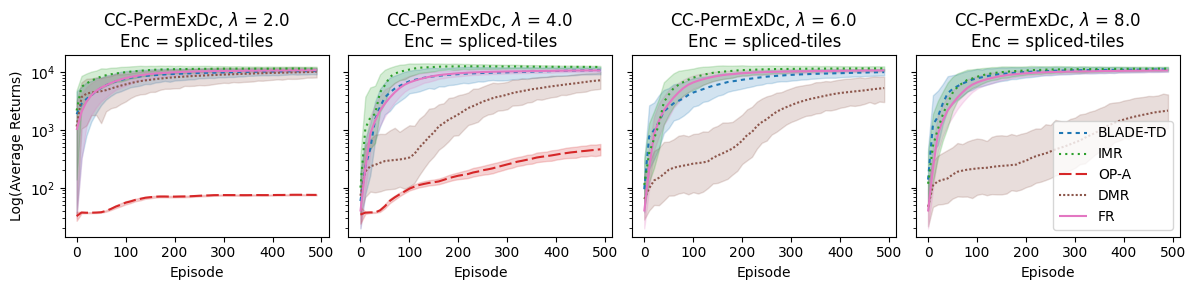

Plotted: 6.022963762283325s.


In [27]:
plot_eval_result(
    env="Finite-CC-PermExDc-v0",
    gamma=1.0,
    df_data=df_returns_curves,
    suffix="sarsa",
)

Proc: 0.02158832550048828s. Plotting...


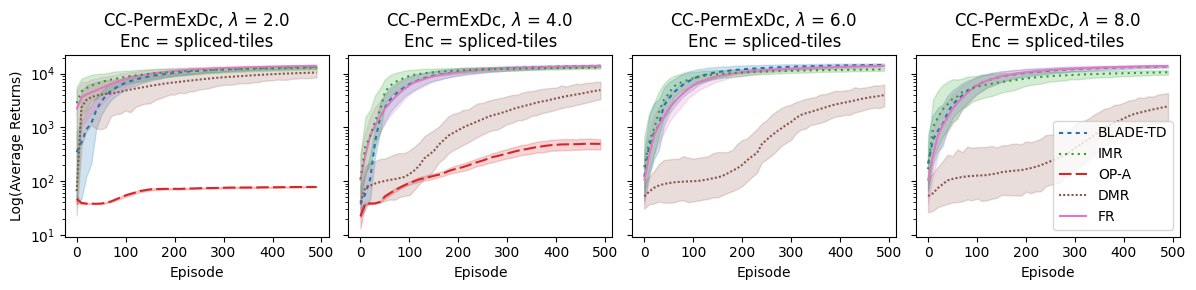

Plotted: 6.274735927581787s.


In [28]:
plot_eval_result(
    env="Finite-CC-PermExDc-v0", gamma=0.99, df_data=df_returns_curves, suffix="sarsa"
)

Proc: 0.00961613655090332s. Plotting...


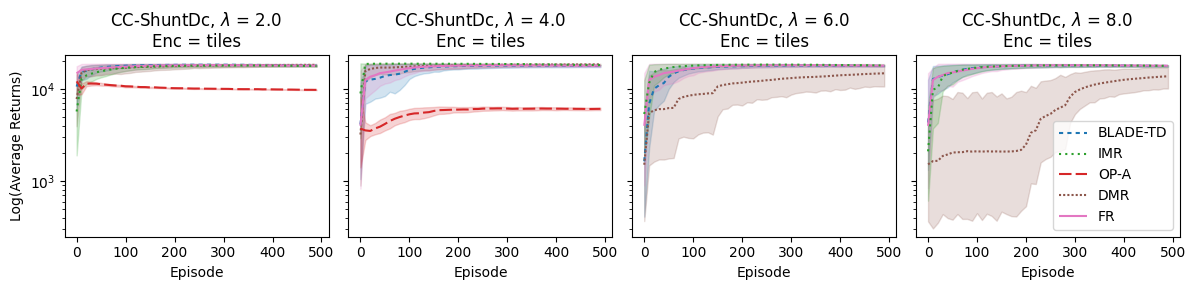

Plotted: 5.76636004447937s.


In [29]:
plot_eval_result(
    env="Finite-CC-ShuntDc-v0", gamma=1.0, df_data=df_returns_curves, suffix="sarsa"
)

Proc: 0.011694908142089844s. Plotting...


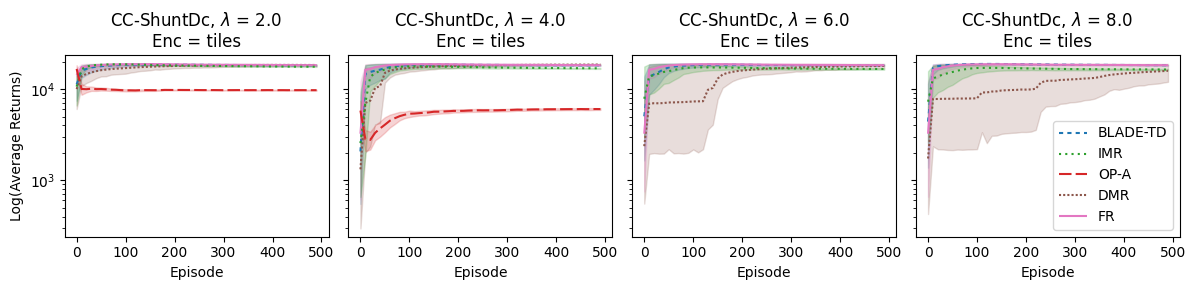

Plotted: 6.137038230895996s.


In [30]:
plot_eval_result(
    env="Finite-CC-ShuntDc-v0", gamma=0.99, df_data=df_returns_curves, suffix="sarsa"
)

Proc: 0.013773202896118164s. Plotting...


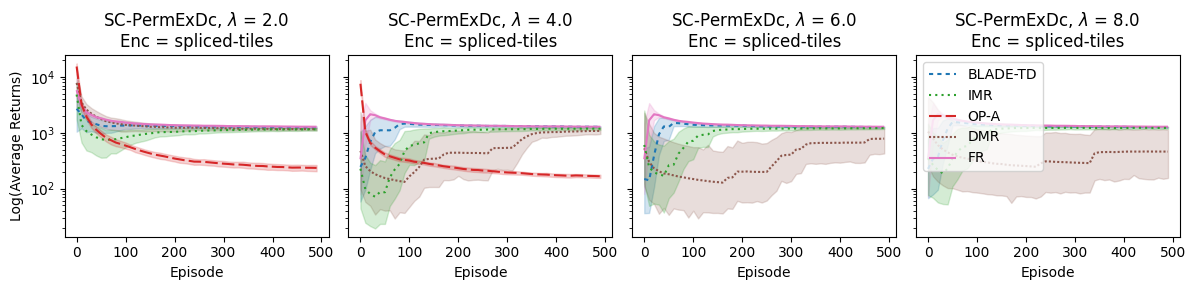

Plotted: 6.1303369998931885s.


In [31]:
plot_eval_result(
    env="Finite-SC-PermExDc-v0", gamma=1.0, df_data=df_returns_curves, suffix="sarsa"
)

Proc: 0.009027957916259766s. Plotting...


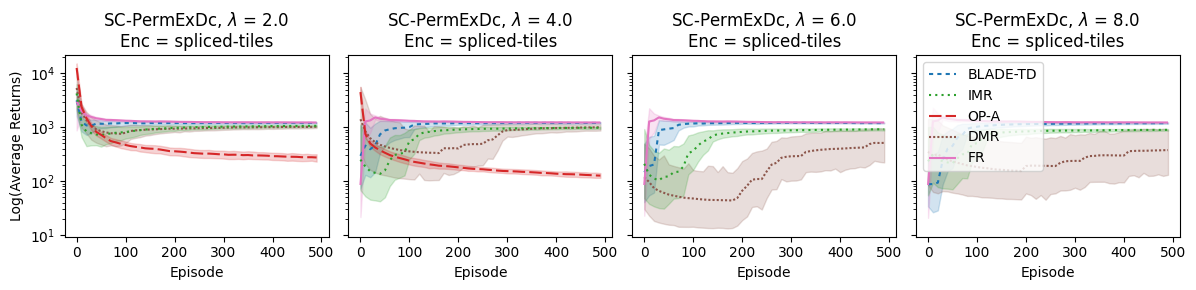

Plotted: 5.774822235107422s.


In [32]:
plot_eval_result(
    env="Finite-SC-PermExDc-v0", gamma=0.99, df_data=df_returns_curves, suffix="sarsa"
)

Proc: 0.010782957077026367s. Plotting...


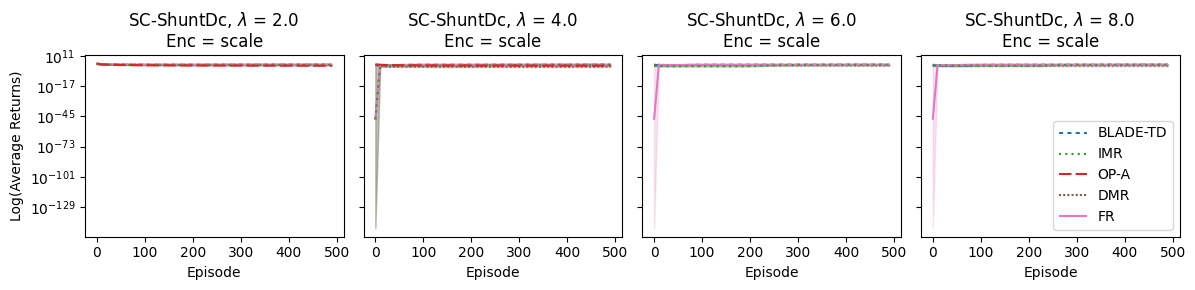

Plotted: 5.5322911739349365s.


In [33]:
plot_eval_result(
    env="Finite-SC-ShuntDc-v0", gamma=1.0, df_data=df_returns_curves, suffix="sarsa"
)

Proc: 0.01576709747314453s. Plotting...


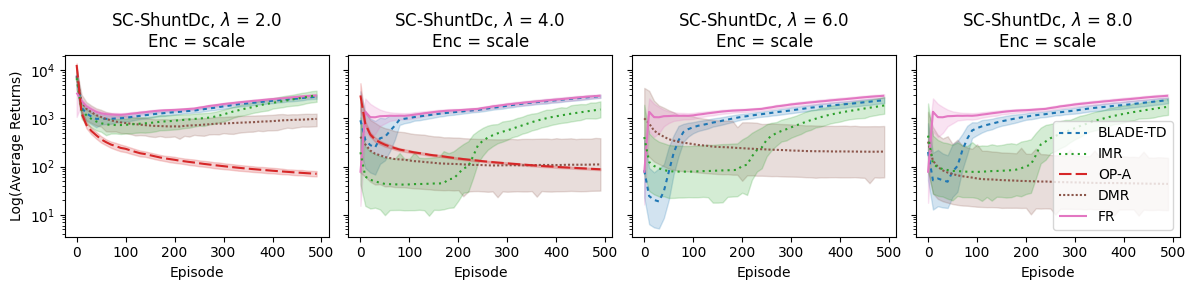

Plotted: 6.289401054382324s.


In [34]:
plot_eval_result(
    env="Finite-SC-ShuntDc-v0", gamma=0.99, df_data=df_returns_curves, suffix="sarsa"
)

Proc: 0.01871633529663086s. Plotting...


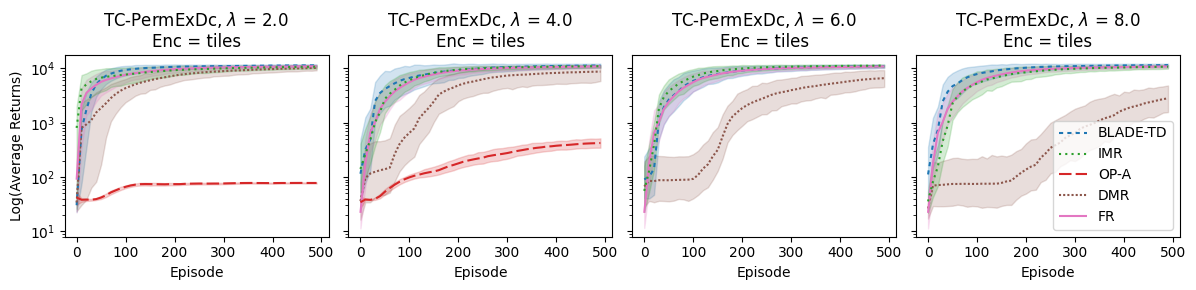

Plotted: 6.04463267326355s.


In [35]:
plot_eval_result(
    env="Finite-TC-PermExDc-v0", gamma=1.0, df_data=df_returns_curves, suffix="sarsa"
)

Proc: 0.013601064682006836s. Plotting...


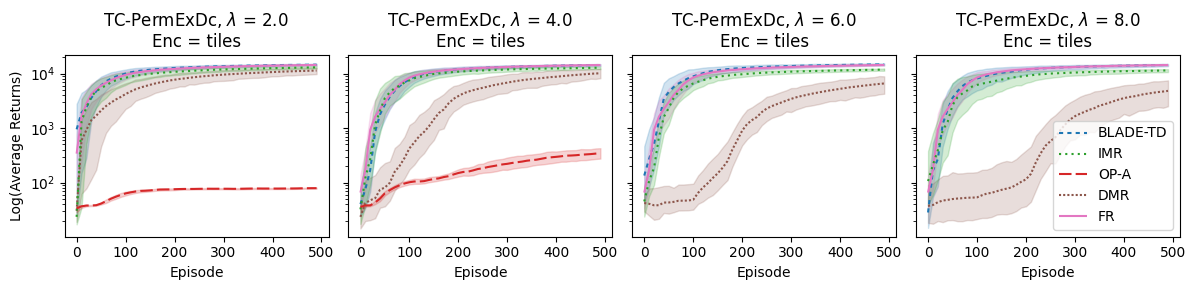

Plotted: 6.3251378536224365s.


In [36]:
plot_eval_result(
    env="Finite-TC-PermExDc-v0", gamma=0.99, df_data=df_returns_curves, suffix="sarsa"
)

Proc: 0.014504194259643555s. Plotting...


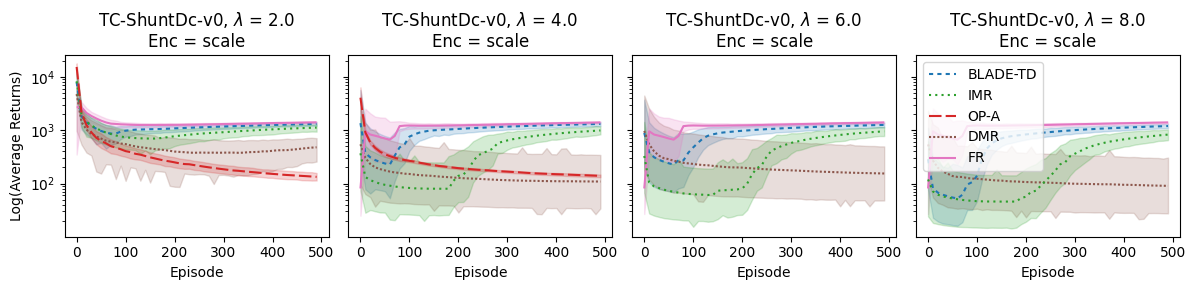

Plotted: 6.80141806602478s.


In [37]:
plot_eval_result(
    env="Finite-TC-ShuntDc-v0", gamma=1.0, df_data=df_returns_curves, suffix="sarsa"
)

Proc: 0.013396024703979492s. Plotting...


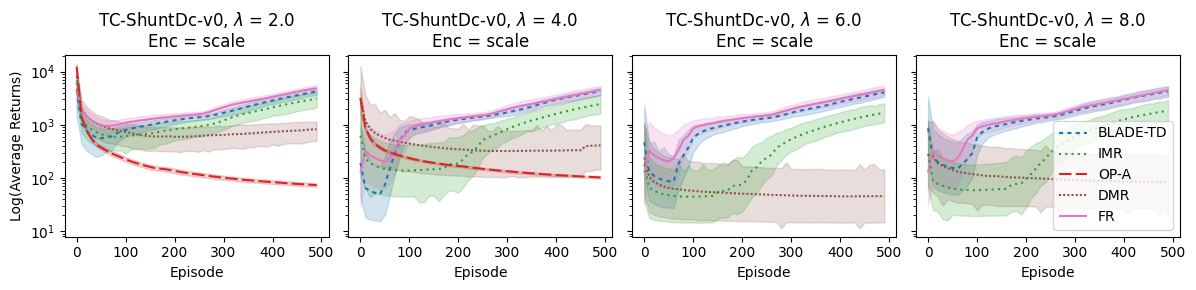

Plotted: 6.3058249950408936s.


In [38]:
plot_eval_result(
    env="Finite-TC-ShuntDc-v0", gamma=0.99, df_data=df_returns_curves, suffix="sarsa"
)